In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/kita_231026/YOLOv_project/adjusted_data.zip') as target_file:

    target_file.extractall('/content/data/') # 압축풀기

In [ ]:
%pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 3.1 MB/s eta 0:00:00


In [17]:
# parking_meter 제외 된 data.yaml 파일

!cat /content/drive/MyDrive/kita_231026/YOLOv_project/data.yaml

names:
- person
- bicycle
- car
- motorcycle
- bus
- tree_trunk
- traffic_light
- stop
- carrier
- cat
- dog
- movable_signage
- scooter
- stroller
- truck
- wheelchair
- barricade
- bench
- bollard
- chair
- fire_hydrant
- kiosk
- pole
- potted_plant
- power_controller
- table
- traffic_light_controller
- traffic_sign
nc: 28
test: /content/data/test/images
train: /content/data/train/images
val: /content/data/valid/images



In [ ]:
!pip install PyYAML -q

In [ ]:
!ls

data  drive  sample_data


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt') # load a pretrained YOLOv8s detection model

100%|██████████| 21.5M/21.5M [00:00<00:00, 289MB/s]


In [ ]:
print(type(model.names), len(model.names))

print(model.names)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

In [18]:
model.train(data='/content/drive/MyDrive/kita_231026/YOLOv_project/data.yaml', epochs=50, patience=20, batch=20, imgsz=1024) #8s epoch 50

Ultralytics YOLOv8.2.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/kita_231026/YOLOv_project/data.yaml, epochs=50, time=None, patience=20, batch=20, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fa

100%|██████████| 755k/755k [00:00<00:00, 38.3MB/s]


Overriding model.yaml nc=80 with nc=28

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 180MB/s]


AMP: checks passed ✅


train: Scanning /content/data/train/labels... 9008 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9008/9008 [00:20<00:00, 434.33it/s]

train: WARNING ⚠️ /content/data/train/images/MP_SEL_005259.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/data/train/images/MP_SEL_018950.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/data/train/images/MP_SEL_267844_B120348.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/data/train/images/MP_SEL_MIN_000230.jpg: 1 duplicate labels removed


train: New cache created: /content/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/data/valid/labels... 1127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1127/1127 [00:03<00:00, 374.83it/s]


val: New cache created: /content/data/valid/labels.cache
Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000313, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      13.9G      1.397      2.159      1.248        199       1024: 100%|██████████| 451/451 [07:16<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:20<00:00,  1.38it/s]


                   all       1127      10516      0.564      0.457      0.503      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      13.5G      1.295      1.343      1.184        107       1024: 100%|██████████| 451/451 [07:07<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:18<00:00,  1.56it/s]


                   all       1127      10516      0.608      0.498       0.54      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      13.5G      1.285      1.264      1.182        105       1024: 100%|██████████| 451/451 [07:06<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:18<00:00,  1.57it/s]


                   all       1127      10516      0.579      0.531       0.56      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50        13G      1.278       1.23      1.182        131       1024: 100%|██████████| 451/451 [07:08<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:18<00:00,  1.55it/s]


                   all       1127      10516      0.671      0.497      0.571      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      13.7G      1.256      1.173      1.167        144       1024: 100%|██████████| 451/451 [07:07<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:20<00:00,  1.45it/s]


                   all       1127      10516      0.647      0.533      0.607      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      13.1G      1.237      1.126      1.153        142       1024: 100%|██████████| 451/451 [07:11<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:18<00:00,  1.57it/s]


                   all       1127      10516      0.691      0.569      0.629       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      12.7G      1.218      1.098      1.144        125       1024: 100%|██████████| 451/451 [07:08<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:18<00:00,  1.55it/s]


                   all       1127      10516      0.652       0.57      0.633      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50        14G      1.207      1.071      1.135        186       1024: 100%|██████████| 451/451 [07:06<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:18<00:00,  1.56it/s]


                   all       1127      10516      0.699      0.569      0.654      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      13.7G      1.191      1.041      1.126        140       1024: 100%|██████████| 451/451 [07:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:17<00:00,  1.62it/s]


                   all       1127      10516      0.704        0.6      0.676      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      13.6G      1.185      1.024       1.12         72       1024: 100%|██████████| 451/451 [07:05<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:18<00:00,  1.56it/s]


                   all       1127      10516      0.682      0.604      0.666      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      13.1G      1.166     0.9999      1.111        170       1024: 100%|██████████| 451/451 [07:05<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:19<00:00,  1.53it/s]


                   all       1127      10516      0.697      0.595       0.67      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      13.4G      1.158     0.9769      1.106        130       1024: 100%|██████████| 451/451 [06:59<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:17<00:00,  1.63it/s]


                   all       1127      10516      0.716      0.608      0.698      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      13.5G      1.144     0.9638      1.097         82       1024: 100%|██████████| 451/451 [07:01<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:18<00:00,  1.60it/s]


                   all       1127      10516      0.718      0.613      0.685      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      13.3G      1.141     0.9551      1.096        112       1024: 100%|██████████| 451/451 [06:58<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:18<00:00,  1.59it/s]


                   all       1127      10516      0.714      0.636        0.7      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      13.7G      1.128     0.9332      1.089         97       1024: 100%|██████████| 451/451 [07:01<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:20<00:00,  1.45it/s]


                   all       1127      10516      0.708      0.633      0.701      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      13.7G      1.125     0.9215      1.087         83       1024: 100%|██████████| 451/451 [06:59<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:21<00:00,  1.32it/s]


                   all       1127      10516      0.724      0.645       0.71      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      13.6G      1.113     0.9099       1.08        145       1024: 100%|██████████| 451/451 [06:59<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:20<00:00,  1.43it/s]


                   all       1127      10516      0.735      0.626      0.707      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      13.4G      1.107     0.8944      1.078        177       1024: 100%|██████████| 451/451 [07:06<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:21<00:00,  1.35it/s]


                   all       1127      10516      0.728      0.648      0.717      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      12.7G      1.099      0.883      1.073        168       1024: 100%|██████████| 451/451 [07:08<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:18<00:00,  1.53it/s]


                   all       1127      10516       0.72      0.637      0.706      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      13.4G      1.092     0.8723      1.068        158       1024: 100%|██████████| 451/451 [07:05<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:18<00:00,  1.60it/s]


                   all       1127      10516      0.731      0.635      0.714      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      13.9G      1.078     0.8573      1.061        133       1024: 100%|██████████| 451/451 [07:07<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:19<00:00,  1.52it/s]


                   all       1127      10516      0.745      0.639      0.723      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      13.6G      1.073     0.8493       1.06        142       1024: 100%|██████████| 451/451 [07:07<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:19<00:00,  1.50it/s]


                   all       1127      10516      0.737      0.656      0.722      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      13.2G      1.072     0.8402      1.056        130       1024: 100%|██████████| 451/451 [07:09<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:20<00:00,  1.40it/s]


                   all       1127      10516       0.75      0.672      0.735      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      13.5G      1.065       0.83      1.054        195       1024: 100%|██████████| 451/451 [07:08<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:18<00:00,  1.57it/s]


                   all       1127      10516      0.748      0.675      0.741       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      14.1G      1.055     0.8217      1.048        130       1024: 100%|██████████| 451/451 [07:08<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:19<00:00,  1.46it/s]


                   all       1127      10516       0.74      0.668      0.733      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50        14G       1.05     0.8086      1.045        205       1024: 100%|██████████| 451/451 [07:05<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:19<00:00,  1.48it/s]


                   all       1127      10516      0.748      0.667      0.734      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      13.2G      1.047     0.8036      1.044        101       1024: 100%|██████████| 451/451 [07:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:21<00:00,  1.35it/s]


                   all       1127      10516      0.774      0.654      0.736      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50        13G      1.037     0.7915      1.039        177       1024: 100%|██████████| 451/451 [07:06<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:19<00:00,  1.47it/s]


                   all       1127      10516      0.744      0.672      0.737      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      13.4G      1.032     0.7818      1.033        137       1024: 100%|██████████| 451/451 [07:07<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:21<00:00,  1.34it/s]


                   all       1127      10516      0.772      0.651      0.741      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      14.4G      1.022     0.7738       1.03        160       1024: 100%|██████████| 451/451 [07:07<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:18<00:00,  1.56it/s]


                   all       1127      10516      0.748      0.665       0.74      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      13.2G      1.017      0.767      1.026         80       1024: 100%|██████████| 451/451 [07:05<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:18<00:00,  1.60it/s]


                   all       1127      10516      0.758      0.658      0.736      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      12.6G      1.012     0.7574      1.024        123       1024: 100%|██████████| 451/451 [07:05<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:18<00:00,  1.59it/s]


                   all       1127      10516      0.778      0.651      0.741        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      13.5G      1.009     0.7535      1.021         77       1024: 100%|██████████| 451/451 [07:06<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:18<00:00,  1.58it/s]


                   all       1127      10516      0.735      0.683      0.743      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      13.9G     0.9991     0.7398      1.016        103       1024: 100%|██████████| 451/451 [07:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:18<00:00,  1.57it/s]


                   all       1127      10516      0.755      0.671      0.747      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      13.8G      0.995     0.7333      1.014        210       1024: 100%|██████████| 451/451 [07:07<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:18<00:00,  1.58it/s]


                   all       1127      10516      0.768      0.673      0.746      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      13.2G     0.9899      0.731      1.013         92       1024: 100%|██████████| 451/451 [07:04<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:20<00:00,  1.45it/s]


                   all       1127      10516      0.768      0.662       0.75      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      14.1G     0.9849     0.7206       1.01        165       1024: 100%|██████████| 451/451 [06:59<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:18<00:00,  1.59it/s]


                   all       1127      10516      0.744      0.687      0.751      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50        14G     0.9842     0.7167      1.008        139       1024: 100%|██████████| 451/451 [06:55<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:20<00:00,  1.39it/s]


                   all       1127      10516      0.771      0.663      0.742      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      13.4G     0.9699     0.7069      1.003         92       1024: 100%|██████████| 451/451 [06:55<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:18<00:00,  1.60it/s]


                   all       1127      10516      0.771      0.656      0.741      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      13.8G     0.9706     0.7021      1.002        160       1024: 100%|██████████| 451/451 [06:57<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:19<00:00,  1.49it/s]


                   all       1127      10516      0.769      0.669      0.747      0.509
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      13.4G      0.951     0.6595     0.9967         83       1024: 100%|██████████| 451/451 [06:32<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:18<00:00,  1.60it/s]


                   all       1127      10516      0.766      0.666       0.74      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      13.5G     0.9319     0.6382     0.9886         58       1024: 100%|██████████| 451/451 [06:23<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:17<00:00,  1.62it/s]


                   all       1127      10516      0.769      0.666      0.742        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      13.5G     0.9252     0.6304     0.9844         53       1024: 100%|██████████| 451/451 [06:27<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:17<00:00,  1.65it/s]


                   all       1127      10516      0.777      0.659      0.745      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      13.4G     0.9188     0.6209      0.983         70       1024: 100%|██████████| 451/451 [06:27<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:19<00:00,  1.49it/s]


                   all       1127      10516      0.763      0.671      0.745      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      13.3G     0.9133     0.6156     0.9786         75       1024: 100%|██████████| 451/451 [06:23<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:17<00:00,  1.62it/s]


                   all       1127      10516      0.762      0.665      0.736      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      13.5G     0.9086     0.6094     0.9764        102       1024: 100%|██████████| 451/451 [06:27<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:19<00:00,  1.51it/s]


                   all       1127      10516       0.79      0.652      0.741      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      13.5G     0.9019     0.6031     0.9717         91       1024: 100%|██████████| 451/451 [06:24<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:17<00:00,  1.61it/s]


                   all       1127      10516      0.794      0.655       0.74      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      13.4G     0.8938     0.5967     0.9696         80       1024: 100%|██████████| 451/451 [06:29<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:19<00:00,  1.51it/s]


                   all       1127      10516      0.779      0.666      0.744      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      13.6G     0.8897     0.5919      0.968         85       1024: 100%|██████████| 451/451 [06:26<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:19<00:00,  1.46it/s]


                   all       1127      10516      0.781      0.663       0.74      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      13.5G     0.8873     0.5896      0.967         54       1024: 100%|██████████| 451/451 [06:34<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:17<00:00,  1.64it/s]


                   all       1127      10516      0.773      0.667      0.739        0.5

50 epochs completed in 6.093 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 22.6MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 22.6MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 11136420 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:29<00:00,  1.02s/it]


                   all       1127      10516      0.769      0.669      0.747      0.509
                person       1127       1450      0.867        0.8      0.885      0.623
               bicycle       1127        231      0.808      0.747      0.831      0.564
                   car       1127       1668       0.85      0.839      0.905      0.712
            motorcycle       1127        225      0.841      0.728      0.837      0.575
                   bus       1127        119      0.777      0.732      0.802      0.595
            tree_trunk       1127       1284      0.761      0.708      0.773      0.466
         traffic_light       1127        290      0.772      0.528      0.665      0.371
                  stop       1127        133      0.739       0.68      0.753      0.525
               carrier       1127        159      0.641      0.506      0.596      0.346
                   cat       1127          6       0.48        0.5      0.494      0.204
                   do

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x792e9657b520>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,   

In [ ]:
model.train(data='/content/drive/MyDrive/KITA_1026/project/ocr/obstacles_data/data.yaml', epochs=20, patience=10, batch=20, imgsz=1024) #8s # 시도 했으나 한 에폭에 23분 걸림

Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/KITA_1026/project/ocr/obstacles_data/data.yaml, epochs=20, time=None, patience=10, batch=20, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, s

100%|██████████| 755k/755k [00:00<00:00, 40.0MB/s]


Overriding model.yaml nc=80 with nc=29

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 158MB/s]


AMP: checks passed ✅


train: Scanning /content/data/train/labels... 9008 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9008/9008 [00:24<00:00, 374.36it/s]

train: WARNING ⚠️ /content/data/train/images/MP_SEL_005259.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/data/train/images/MP_SEL_018950.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/data/train/images/MP_SEL_267844_B120348.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/data/train/images/MP_SEL_MIN_000230.jpg: 1 duplicate labels removed


train: New cache created: /content/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/data/valid/labels... 1127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1127/1127 [00:03<00:00, 354.86it/s]


val: New cache created: /content/data/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000303, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      13.3G      1.407      2.246      1.265        199       1024: 100%|██████████| 451/451 [07:48<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.28it/s]


                   all       1127      10523       0.58      0.459      0.496      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      13.2G      1.295      1.354      1.187        118       1024: 100%|██████████| 451/451 [07:33<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:19<00:00,  1.46it/s]


                   all       1127      10523      0.654      0.447      0.497       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      14.8G      1.276      1.261      1.178        105       1024: 100%|██████████| 451/451 [07:27<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:19<00:00,  1.46it/s]


                   all       1127      10523      0.627      0.505      0.551      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      13.2G      1.272      1.216      1.176        136       1024: 100%|██████████| 451/451 [07:29<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:21<00:00,  1.33it/s]


                   all       1127      10523      0.683       0.52      0.593      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      14.2G      1.239      1.147      1.156        144       1024: 100%|██████████| 451/451 [07:38<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:21<00:00,  1.33it/s]


                   all       1127      10523      0.693      0.521      0.605      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      13.2G      1.218        1.1      1.141        103       1024: 100%|██████████| 451/451 [07:30<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:19<00:00,  1.49it/s]


                   all       1127      10523      0.701      0.545      0.614      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      12.7G      1.193      1.061      1.129        125       1024: 100%|██████████| 451/451 [07:27<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:20<00:00,  1.43it/s]


                   all       1127      10523       0.72      0.566       0.64      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      13.7G       1.18      1.033       1.12        125       1024: 100%|██████████| 451/451 [07:27<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:20<00:00,  1.44it/s]


                   all       1127      10523      0.691      0.582      0.644      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      13.8G      1.166      1.005       1.11        140       1024: 100%|██████████| 451/451 [07:23<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:20<00:00,  1.41it/s]


                   all       1127      10523      0.706      0.598      0.663      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      13.3G      1.152     0.9728      1.101         99       1024: 100%|██████████| 451/451 [07:24<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:19<00:00,  1.48it/s]


                   all       1127      10523      0.716        0.6       0.67      0.437
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      13.4G       1.13     0.9284        1.1         83       1024: 100%|██████████| 451/451 [07:00<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:20<00:00,  1.39it/s]


                   all       1127      10523      0.731      0.601      0.665      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      13.6G      1.111     0.8972      1.088         61       1024: 100%|██████████| 451/451 [06:51<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:21<00:00,  1.38it/s]


                   all       1127      10523       0.75      0.618      0.688      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      13.4G      1.098     0.8686       1.08         72       1024: 100%|██████████| 451/451 [06:51<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:20<00:00,  1.40it/s]


                   all       1127      10523      0.759      0.608      0.682      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      13.5G       1.08      0.846      1.072         72       1024: 100%|██████████| 451/451 [06:52<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:19<00:00,  1.49it/s]


                   all       1127      10523      0.752       0.61      0.689      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      13.4G      1.065     0.8271      1.064         77       1024: 100%|██████████| 451/451 [06:54<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:19<00:00,  1.47it/s]


                   all       1127      10523       0.76      0.604      0.696      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      13.6G       1.05     0.8052      1.054         66       1024: 100%|██████████| 451/451 [06:56<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:19<00:00,  1.48it/s]


                   all       1127      10523      0.745      0.617      0.696      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      13.4G      1.037     0.7843      1.046         73       1024: 100%|██████████| 451/451 [06:50<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:19<00:00,  1.50it/s]


                   all       1127      10523      0.768      0.626      0.702      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      13.4G      1.024     0.7633      1.039         69       1024: 100%|██████████| 451/451 [06:48<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:20<00:00,  1.44it/s]


                   all       1127      10523      0.771      0.639      0.714       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      13.5G       1.01     0.7493      1.032         88       1024: 100%|██████████| 451/451 [06:49<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:19<00:00,  1.48it/s]


                   all       1127      10523      0.774      0.624      0.713       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      13.5G     0.9968     0.7289      1.027         73       1024: 100%|██████████| 451/451 [06:54<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:20<00:00,  1.45it/s]


                   all       1127      10523      0.769      0.642      0.717      0.485

20 epochs completed in 2.527 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 11136807 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:31<00:00,  1.07s/it]


                   all       1127      10523      0.769      0.642      0.717      0.486
                person       1127       1450      0.873      0.807      0.884      0.628
               bicycle       1127        231      0.786      0.766      0.823      0.563
                   car       1127       1668      0.843      0.833      0.905      0.709
            motorcycle       1127        225      0.803      0.738      0.827      0.545
                   bus       1127        119      0.772      0.681      0.801      0.569
            tree_trunk       1127       1284      0.778      0.693      0.779      0.471
         traffic_light       1127        290      0.759      0.554      0.644      0.351
                  stop       1127        133      0.743       0.74       0.78      0.522
               carrier       1127        159      0.621      0.472      0.518        0.3
                   cat       1127          6      0.565      0.667      0.657      0.322
                   do

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ebcb4f6d420>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004

In [ ]:
model = YOLO('/content/runs/detect/train/weights/last.pt')
model.resume = True

# train the model
model.train(
    data='/content/drive/MyDrive/KITA_1026/project/ocr/obstacles_data/data.yaml', epochs=30, patience=20, batch=20, imgsz=1024 # number of additional epochs you want to train on
)

Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train/weights/last.pt, data=/content/drive/MyDrive/KITA_1026/project/ocr/obstacles_data/data.yaml, epochs=30, time=None, patience=20, batch=20, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, s

train: Scanning /content/data/train/labels.cache... 9008 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9008/9008 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/data/train/images/MP_SEL_005259.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/data/train/images/MP_SEL_018950.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/data/train/images/MP_SEL_267844_B120348.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/data/train/images/MP_SEL_MIN_000230.jpg: 1 duplicate labels removed


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/data/valid/labels.cache... 1127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1127/1127 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000303, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      13.8G      1.063     0.8341      1.053        199       1024: 100%|██████████| 451/451 [07:49<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:18<00:00,  1.53it/s]


                   all       1127      10523      0.747      0.628       0.69      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      13.5G      1.084     0.8711      1.062        118       1024: 100%|██████████| 451/451 [07:34<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:21<00:00,  1.37it/s]


                   all       1127      10523      0.742      0.583      0.668      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      14.9G      1.107     0.9068      1.076        105       1024: 100%|██████████| 451/451 [07:31<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:19<00:00,  1.52it/s]


                   all       1127      10523      0.745      0.586      0.658      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      13.3G      1.126     0.9361      1.088        136       1024: 100%|██████████| 451/451 [07:31<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:20<00:00,  1.40it/s]


                   all       1127      10523      0.748      0.575      0.665      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      14.4G      1.113     0.9169       1.08        144       1024: 100%|██████████| 451/451 [07:32<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:20<00:00,  1.44it/s]


                   all       1127      10523      0.735      0.588      0.668      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      13.4G      1.109      0.902      1.076        103       1024: 100%|██████████| 451/451 [07:35<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:20<00:00,  1.38it/s]


                   all       1127      10523      0.704      0.604      0.664      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      12.8G      1.124     0.8995      1.092        353       1024:   2%|▏         | 8/451 [00:04<04:36,  1.60it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



KeyboardInterrupt: 

In [ ]:
model.train(data='/content/drive/MyDrive/KITA_1026/project/ocr/obstacles_data/data.yaml', epochs=20, patience=10, batch=32, imgsz=1024) # 8n

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/KITA_1026/project/ocr/obstacles_data/data.yaml, epochs=20, time=None, patience=10, batch=32, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fal

100%|██████████| 755k/755k [00:00<00:00, 23.4MB/s]


Overriding model.yaml nc=80 with nc=29

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/MyDrive/KITA_1026/project/ocr/obstacles_data/train/labels... 9008 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9008/9008 [14:30<00:00, 10.35it/s]

train: WARNING ⚠️ /content/drive/MyDrive/KITA_1026/project/ocr/obstacles_data/train/images/MP_SEL_005259.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/KITA_1026/project/ocr/obstacles_data/train/images/MP_SEL_018950.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/KITA_1026/project/ocr/obstacles_data/train/images/MP_SEL_267844_B120348.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/KITA_1026/project/ocr/obstacles_data/train/images/MP_SEL_MIN_000230.jpg: 1 duplicate labels removed


train: New cache created: /content/drive/MyDrive/KITA_1026/project/ocr/obstacles_data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/KITA_1026/project/ocr/obstacles_data/valid/labels... 1127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1127/1127 [01:47<00:00, 10.47it/s]


val: New cache created: /content/drive/MyDrive/KITA_1026/project/ocr/obstacles_data/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000303, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      13.6G       1.59      3.272      1.323        274       1024: 100%|██████████| 282/282 [03:20<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.62it/s]


                   all       1127      10523      0.533      0.276      0.277      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      13.4G      1.463      1.998      1.264        231       1024: 100%|██████████| 282/282 [03:16<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:10<00:00,  1.80it/s]


                   all       1127      10523      0.567       0.35      0.386      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      14.2G      1.423       1.79      1.244        239       1024: 100%|██████████| 282/282 [03:16<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.82it/s]


                   all       1127      10523      0.538      0.382       0.42      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      12.1G      1.399      1.661      1.225        246       1024: 100%|██████████| 282/282 [03:16<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.84it/s]


                   all       1127      10523      0.503      0.422      0.446      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      12.8G      1.374      1.544       1.21        223       1024: 100%|██████████| 282/282 [03:16<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.82it/s]


                   all       1127      10523      0.571      0.421      0.486      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      11.9G      1.351      1.454      1.193        188       1024: 100%|██████████| 282/282 [03:16<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.84it/s]


                   all       1127      10523      0.595      0.446      0.498      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      12.2G      1.334      1.396      1.183        307       1024: 100%|██████████| 282/282 [03:16<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.82it/s]


                   all       1127      10523      0.609      0.463      0.505      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      13.7G       1.32      1.351      1.174        277       1024: 100%|██████████| 282/282 [03:16<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.84it/s]


                   all       1127      10523      0.567      0.508      0.524      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      14.7G        1.3      1.306      1.165        237       1024: 100%|██████████| 282/282 [03:16<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.86it/s]


                   all       1127      10523      0.611      0.502      0.538      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      14.8G      1.292      1.283      1.159        253       1024: 100%|██████████| 282/282 [03:16<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.85it/s]


                   all       1127      10523      0.611      0.502      0.544      0.341
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      12.6G       1.28      1.274      1.164        128       1024: 100%|██████████| 282/282 [03:12<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.83it/s]


                   all       1127      10523      0.627      0.511      0.553      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      11.5G      1.259      1.214      1.151        117       1024: 100%|██████████| 282/282 [03:07<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.84it/s]


                   all       1127      10523      0.638      0.478       0.55      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      12.1G      1.247      1.184      1.147        177       1024: 100%|██████████| 282/282 [03:07<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.87it/s]


                   all       1127      10523      0.672      0.502      0.566      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      11.8G      1.237       1.15      1.138        149       1024: 100%|██████████| 282/282 [03:07<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.86it/s]


                   all       1127      10523      0.653      0.507      0.571      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      11.5G      1.224      1.134      1.134        141       1024: 100%|██████████| 282/282 [03:07<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.87it/s]


                   all       1127      10523      0.617      0.539      0.575      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      12.4G      1.213      1.114      1.126        138       1024: 100%|██████████| 282/282 [03:07<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.86it/s]


                   all       1127      10523      0.637      0.541       0.58      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20        12G        1.2      1.091       1.12        167       1024: 100%|██████████| 282/282 [03:08<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.83it/s]


                   all       1127      10523      0.705      0.508      0.596       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      12.1G      1.192      1.077      1.113        138       1024: 100%|██████████| 282/282 [03:08<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.84it/s]


                   all       1127      10523      0.678      0.527      0.597      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      12.3G      1.183       1.06      1.109        191       1024: 100%|██████████| 282/282 [03:07<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.88it/s]


                   all       1127      10523      0.683      0.533      0.604      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      12.1G      1.172      1.047      1.102        135       1024: 100%|██████████| 282/282 [03:07<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.87it/s]


                   all       1127      10523      0.678      0.533      0.605      0.388

20 epochs completed in 1.130 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3011303 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.07it/s]


                   all       1127      10523      0.679      0.534      0.605      0.388
                person       1127       1450      0.821       0.77      0.838      0.562
               bicycle       1127        231      0.702      0.658      0.725      0.461
                   car       1127       1668      0.804      0.806      0.864      0.648
            motorcycle       1127        225      0.816      0.711      0.779      0.486
                   bus       1127        119      0.693      0.622      0.717      0.464
            tree_trunk       1127       1284      0.761      0.651      0.731      0.424
         traffic_light       1127        290      0.607      0.407      0.449      0.235
                  stop       1127        133      0.607      0.564      0.623      0.395
               carrier       1127        159      0.554      0.352       0.42       0.21
                   cat       1127          6      0.661      0.327      0.401      0.141
                   do

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x789a39620790>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004

In [ ]:
print(type(model.names), len(model.names))

print(model.names)

<class 'dict'> 29
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'bus', 5: 'tree_trunk', 6: 'traffic_light', 7: 'stop', 8: 'carrier', 9: 'cat', 10: 'dog', 11: 'movable_signage', 12: 'scooter', 13: 'stroller', 14: 'truck', 15: 'wheelchair', 16: 'barricade', 17: 'bench', 18: 'bollard', 19: 'chair', 20: 'fire_hydrant', 21: 'kiosk', 22: 'parking_meter', 23: 'pole', 24: 'potted_plant', 25: 'power_controller', 26: 'table', 27: 'traffic_light_controller', 28: 'traffic_sign'}


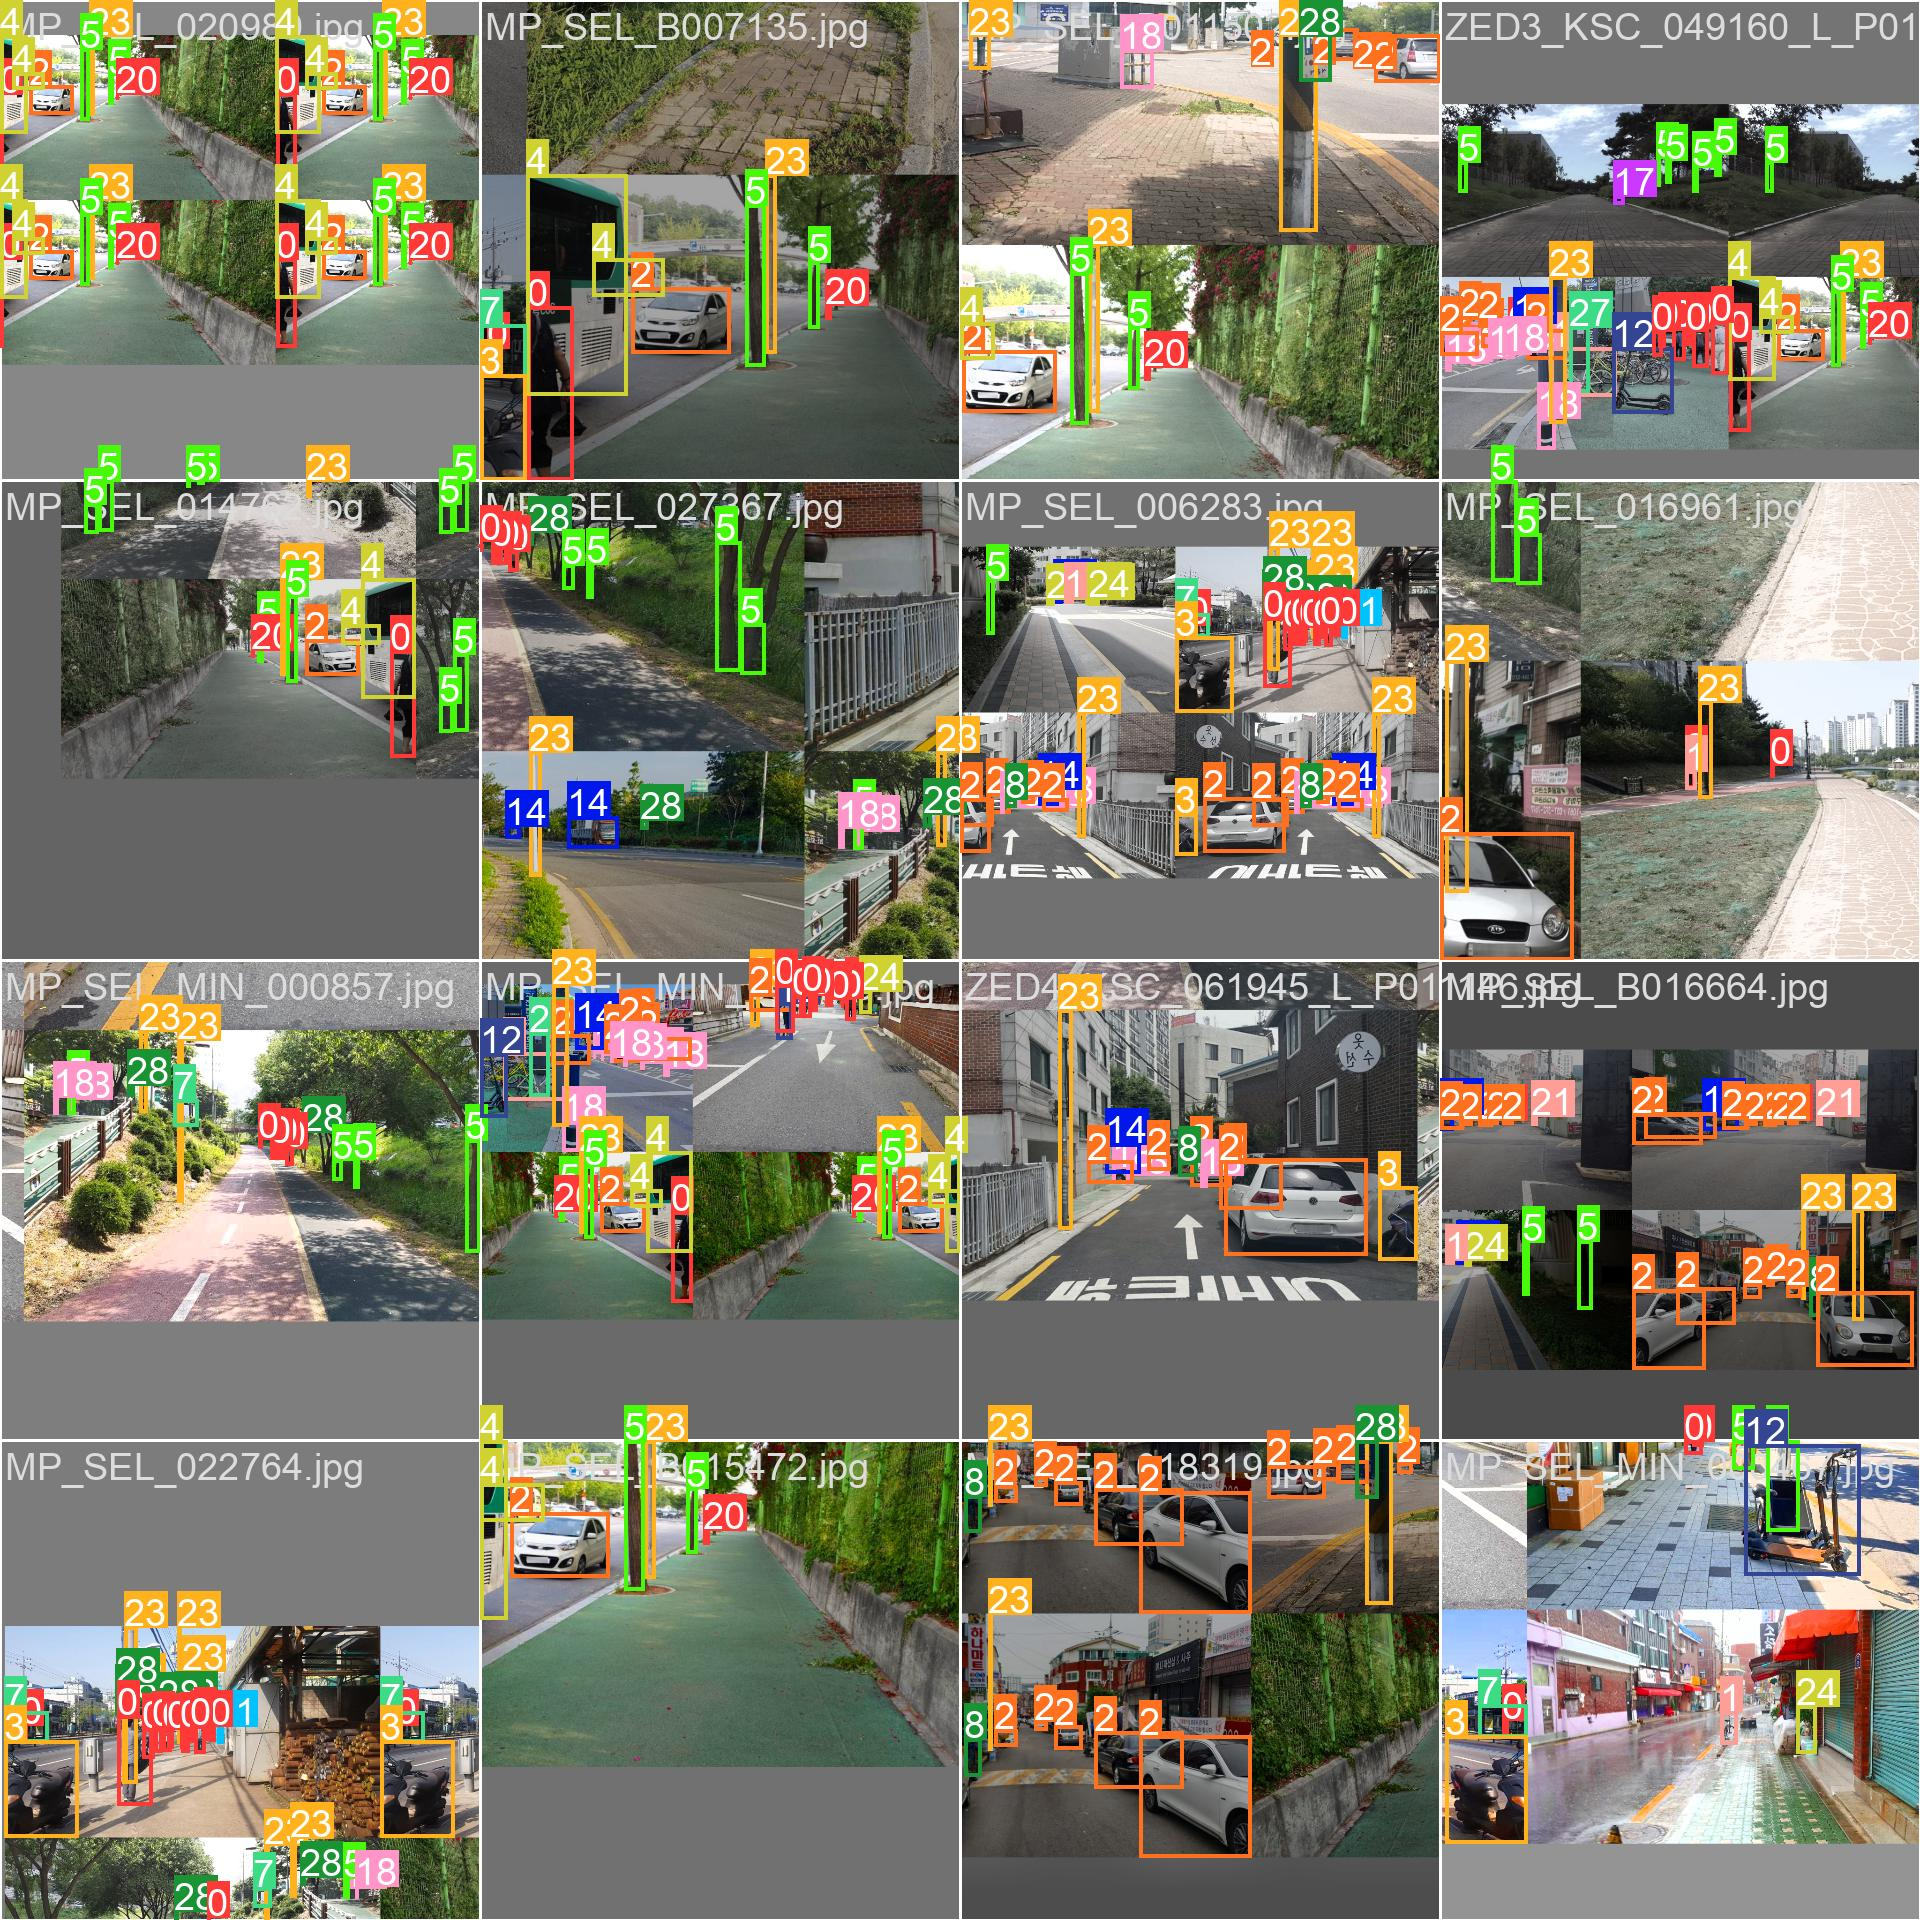

In [ ]:
from PIL import Image
from IPython.display import Image, clear_output

Image(filename='/content/runs/detect/train/train_batch0.jpg',width=1000)

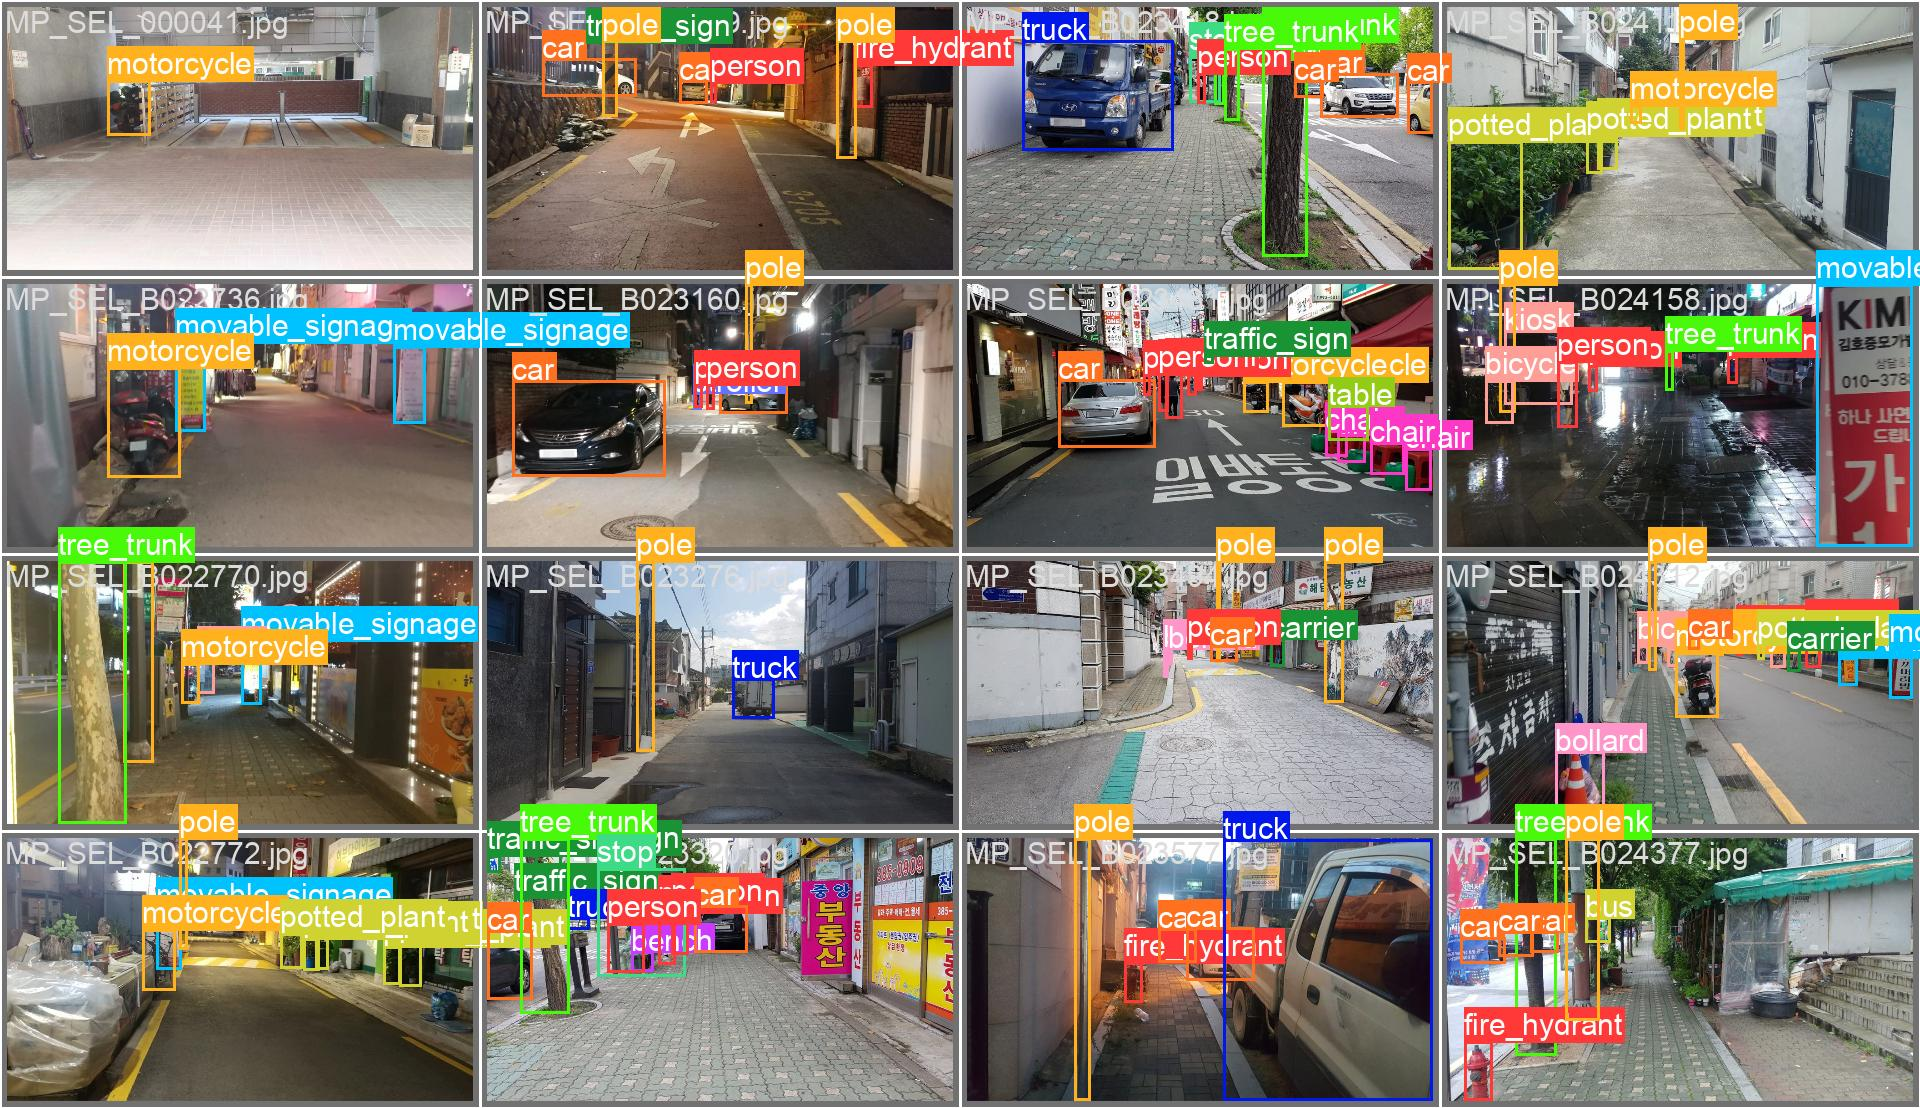

In [ ]:
Image(filename='/content/runs/detect/train/val_batch0_labels.jpg',width=1000)

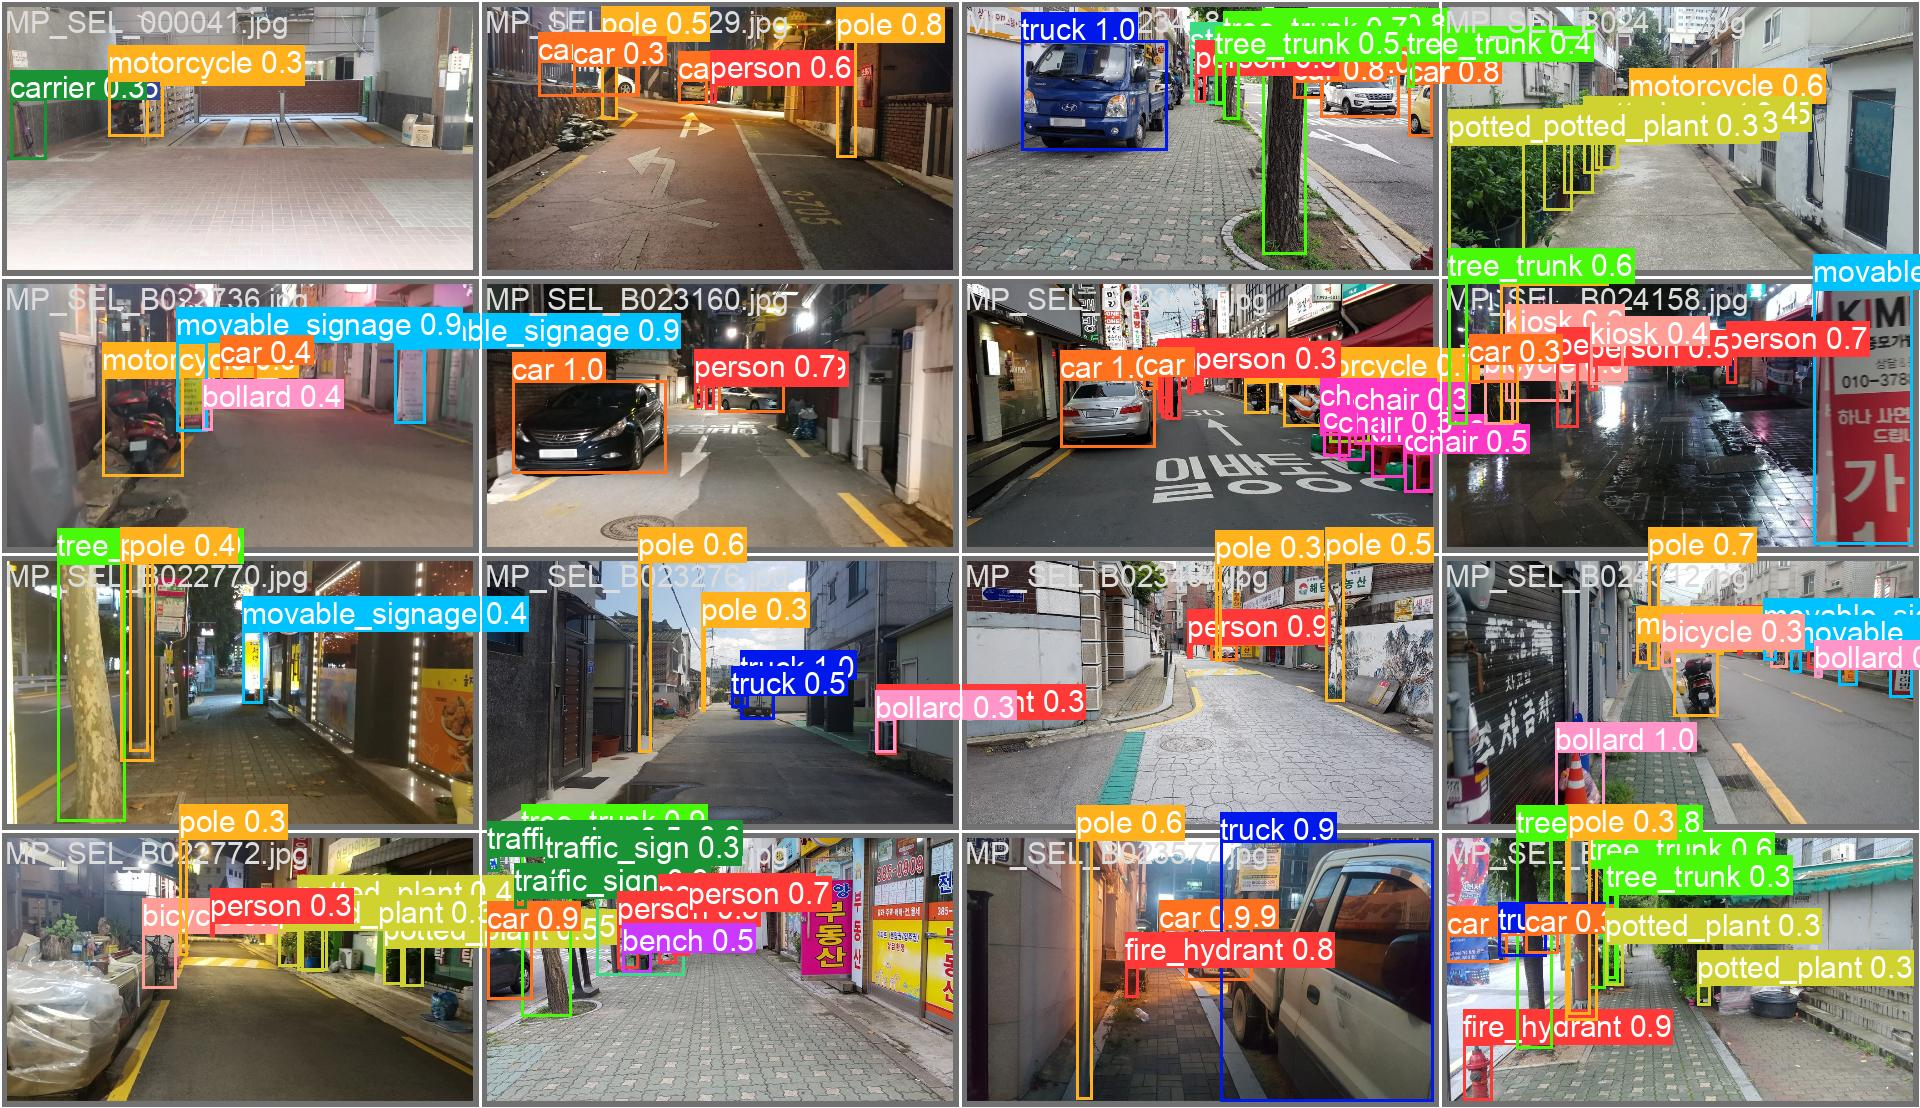

In [ ]:
Image(filename='/content/runs/detect/train/val_batch0_pred.jpg',width=1000)

In [ ]:
# 모델 내보내기
# %mkdir /content/drive/MyDrive/kdt_231026/m8_vision/pothole
# %cp /content/yolov5/runs/train/pothole_results/weights/best.pt /content/drive/MyDrive/kdt_231026/m8_vision/pothole

In [20]:
# 모델 돌린 후 저장

import shutil

source_folder = '/content/runs/detect/train3'
destination_folder = '/content/drive/MyDrive/kita_231026/YOLOv_project/obstacles_data/yolov8s_epoch50'

# 폴더 전체를 복사
shutil.copytree(source_folder, destination_folder)

'/content/drive/MyDrive/kita_231026/YOLOv_project/obstacles_data/yolov8s_epoch50'

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
results = model.predict(source='/content/drive/MyDrive/KITA_1026/project/ocr/obstacles_data/test/images/', save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1126 /content/drive/MyDrive/KITA_1026/project/ocr/obstacles_data/test/images/MP_SEL_000145.jpg: 576x1024 2 persons, 9 cars, 1 stroller, 67.7ms
image 2/1126 /content/drive/MyDrive/KITA_1026/project/ocr/obstacles_data/test/images/MP_SEL_000283.jpg: 576x1024 4 tree_trunks, 8.9ms
image 3/1126 /content/drive/MyDrive/KITA_1026/project/ocr/obstacles_data/test/images/MP_SEL_000347.jpg: 576x1024 4 cars, 1 tree_trunk, 1 stop, 1 movable_signage, 1 bollard

In [ ]:
print(type(results),len(results))

<class 'list'> 1126


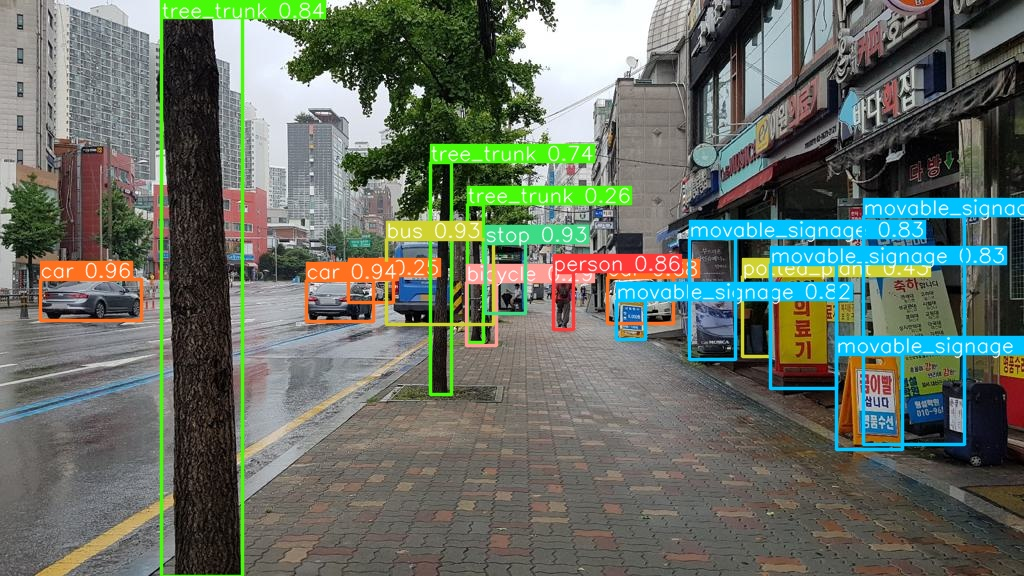

In [ ]:
import glob
import random
from IPython.display import Image, display

# test 데이터는 실제랑 비슷하게 한다고 검출되는 것이 거의 없는 이미지들로 골라놓았다고 한다.
image_name = random.choice(glob.glob('/content/runs/detect/train2/*.jpg')) # test 한 results 랜덤으로 뽑기
display(Image(filename=image_name,width=1000))